<a href="https://colab.research.google.com/github/hafizhr12/testing/blob/main/Beruang_Madu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install range_key_dict
!pip install -U imbalanced-learn
!pip install scikit-learn==1.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 5.1 MB/s 
     |████████████████████████████████| 199 kB 42.4 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.2 MB 1.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data Collection

df_bpjs = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sampling_healtkathon2022.csv")
df_diagnose = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sampling_healthkathon2022_diagnosa.csv")
df_procedure = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sampling_healthkathon2022_procedure.csv")

## Data Prep (Check Data Quality)

#### 1. Duplicate Data

In [ ]:
df_bpjs.value_counts()

id        id_peserta  dati2  typefaskes  usia  jenkel  pisat  tgldatang                 tglpulang                 jenispel  politujuan  diagfktp  biaya     jenispulang  cbg       kelasrawat  kdsa  kdsp  kdsr  kdsi  kdsd  label
3481090   3426723     187    SD          28    P       4.0    2018-03-11T17:00:00.000Z  2018-03-11T17:00:00.000Z  2         OBG         E28.2     178700.0  1.0          Z-3-27-0  3           None  None  None  None  None  0        2
11146119  7139795     238    C           31    L       1.0    2018-03-18T17:00:00.000Z  2018-03-18T17:00:00.000Z  2         SAR         I64       139600.0  1.0          Z-3-12-0  3           None  None  None  None  None  0        2
8603080   574878      171    SB          30    L       1.0    2020-11-11T17:00:00.000Z  2020-11-11T17:00:00.000Z  2         BSY         G50       192400.0  1.0          Q-5-44-0  3           None  None  None  None  None  0        2
2         1173029     1      SD          9     P       4.0    2018-01-01T17:0

In [ ]:
df_bpjs.shape

(11401882, 22)

In [ ]:
df_procedure.value_counts()

id        proc 
3966586   67.61    4
          99.04    4
          86.22    4
10749999  99.18    2
10608307  93.96    2
                  ..
4554211   99.18    1
4554212   39.95    1
4554213   90.59    1
4554215   90.59    1
11426953  23.09    1
Length: 12202824, dtype: int64

In [ ]:
df_procedure.shape

(12202871, 2)

In [ ]:
df_diagnose.value_counts()

id        diag   levelid
4020415   T81.3  2          4
          O82.9  1          4
3966586   D64.9  2          4
          T81.3  1          4
4020415   O99.0  2          4
                           ..
3976361   L01.0  1          1
3976362   S09.8  1          1
3976363   J45.9  1          1
3976364   J06.9  2          1
11426957  R10.0  1          1
Length: 17308480, dtype: int64

In [ ]:
df_diagnose.shape

(17308536, 3)

In [ ]:
df_bpjs_dupe = df_bpjs.drop_duplicates()
df_procedure_dupe = df_procedure.drop_duplicates()
df_diagnose_dupe = df_diagnose.drop_duplicates()

In [ ]:
print(df_bpjs_dupe.shape)
print(df_procedure_dupe.shape)
print(df_diagnose_dupe.shape)

(11401868, 22)
(12202824, 2)
(17308480, 3)


In [ ]:
df_bpjs_dupe.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11401868 entries, 0 to 11401881
Data columns (total 22 columns):
 #   Column       Non-Null Count     Dtype  
---  ------       --------------     -----  
 0   id           11401868 non-null  int64  
 1   id_peserta   11401868 non-null  int64  
 2   dati2        11401868 non-null  int64  
 3   typefaskes   11401868 non-null  object 
 4   usia         11401868 non-null  int64  
 5   jenkel       11401819 non-null  object 
 6   pisat        11401678 non-null  float64
 7   tgldatang    11401868 non-null  object 
 8   tglpulang    11401868 non-null  object 
 9   jenispel     11401868 non-null  int64  
 10  politujuan   7360424 non-null   object 
 11  diagfktp     11399338 non-null  object 
 12  biaya        11344053 non-null  float64
 13  jenispulang  11401829 non-null  float64
 14  cbg          11401868 non-null  object 
 15  kelasrawat   11401868 non-null  int64  
 16  kdsa         11203198 non-null  object 
 17  kdsp         11204861 non

In [ ]:
df_bpjs_dupe.describe()

,id,id_peserta,dati2,usia,pisat,jenispel,biaya,jenispulang,kelasrawat,label
count,1.140187e+07,1.140187e+07,1.140187e+07,1.140187e+07,1.140168e+07,1.140187e+07,1.134405e+07,1.140183e+07,1.140187e+07,1.140187e+07
mean,5.712718e+06,4.199294e+06,1.825299e+02,3.705690e+01,2.498204e+00,1.645544e+00,2.146843e+06,1.094596e+00,2.784696e+00,1.375950e-02
std,3.298534e+06,2.436249e+06,1.061352e+02,2.292188e+01,1.390863e+00,4.783481e-01,5.207570e+06,5.131554e-01,5.511468e-01,1.164911e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.855429e+06,2.119460e+06,1.140000e+02,1.800000e+01,1.000000e+00,1.000000e+00,1.904000e+05,1.000000e+00,3.000000e+00,0.000000e+00
50%,5.712226e+06,4.161532e+06,1.590000e+02,3.900000e+01,3.000000e+00,2.000000e+00,2.872000e+05,1.000000e+00,3.000000e+00,0.000000e+00
75%,8.568898e+06,6.292148e+06,2.280000e+02,5.600000e+01,4.000000e+00,2.000000e+00,2.996000e+06,1.000000e+00,3.000000e+00,0.000000e+00
max,1.142696e+07,8.527919e+06,5.280000e+02,1.100000e+02,5.000000e+00,2.000000e+00,4.016966e+08,5.000000e+00,3.000000e+00,1.000000e+00


In [ ]:
df_bpjs_dupe.isnull().sum()

id                   0
id_peserta           0
dati2                0
typefaskes           0
usia                 0
jenkel              49
pisat              190
tgldatang            0
tglpulang            0
jenispel             0
politujuan     4041444
diagfktp          2530
biaya            57815
jenispulang         39
cbg                  0
kelasrawat           0
kdsa            198670
kdsp            197007
kdsr            198459
kdsi            198463
kdsd            195181
label                0
dtype: int64

#### 2. Drop Unnecessary Data and Columns

In [ ]:
df_bpjs_notnull = df_bpjs_dupe.dropna(thresh=17)

In [ ]:
df_bpjs_dupe.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11401868 entries, 0 to 11401881
Data columns (total 22 columns):
 #   Column       Non-Null Count     Dtype  
---  ------       --------------     -----  
 0   id           11401868 non-null  int64  
 1   id_peserta   11401868 non-null  int64  
 2   dati2        11401868 non-null  int64  
 3   typefaskes   11401868 non-null  object 
 4   usia         11401868 non-null  int64  
 5   jenkel       11401819 non-null  object 
 6   pisat        11401678 non-null  float64
 7   tgldatang    11401868 non-null  object 
 8   tglpulang    11401868 non-null  object 
 9   jenispel     11401868 non-null  int64  
 10  politujuan   7360424 non-null   object 
 11  diagfktp     11399338 non-null  object 
 12  biaya        11344053 non-null  float64
 13  jenispulang  11401829 non-null  float64
 14  cbg          11401868 non-null  object 
 15  kelasrawat   11401868 non-null  int64  
 16  kdsa         11203198 non-null  object 
 17  kdsp         11204861 non

In [ ]:
# filling jenis kelamin dengan cara random L dan P
from random import choice

mask = df_bpjs_notnull["jenkel"].isna()
df_bpjs_notnull.loc[mask,['jenkel']] = df_bpjs_notnull.loc[mask,["jenkel"]].applymap(lambda _: choice(["L","P"]))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [ ]:
df_bpjs_notnull['pisat'].bfill(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df_bpjs_notnull = df_bpjs_notnull[df_bpjs_notnull['politujuan'].notna()]

In [ ]:
# buang politujuan yang null
df_bpjs_notnull = df_bpjs_notnull[df_bpjs_notnull['politujuan'].notna()]

In [ ]:
# buang diagfktp yang null
df_bpjs_notnull = df_bpjs_notnull[df_bpjs_notnull['diagfktp'].notna()]

In [ ]:
# buang biaya yang null
df_bpjs_notnull = df_bpjs_notnull[df_bpjs_notnull['biaya'].notna()]

In [ ]:
# buang jenispulang yang null
df_bpjs_notnull = df_bpjs_notnull[df_bpjs_notnull['jenispulang'].notna()]

In [ ]:
df_bpjs_notnull[["kdsa","kdsp","kdsr","kdsi","kdsd"]] = df_bpjs_notnull[["kdsa","kdsp","kdsr","kdsi","kdsd"]].fillna("None")

In [ ]:
df_bpjs_notnull.shape

(7318108, 22)

#### 3.Merge dataset

In [ ]:
df_bpjs_clean = pd.merge(df_bpjs_notnull, df_diagnose_dupe, how="left", on=["id"])
df_bpjs_clean = pd.merge(df_bpjs_clean, df_procedure_dupe, how="left", on=["id"])

In [ ]:
# buang proc yang nilainya null
df_bpjs_clean = df_bpjs_clean[df_bpjs_clean['proc'].notna()]

In [ ]:
df_bpjs_clean = df_bpjs_clean[~df_bpjs_clean['diag'].str[0].str.isdigit()]
df_bpjs_clean = df_bpjs_clean[df_bpjs_clean['proc'].str[0].str.isdigit()]

In [ ]:
df_bpjs_clean.head()

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label,diag,levelid,proc
11,143197,736,17,KI,46,P,1.0,2020-04-19T17:00:00.000Z,2020-04-19T17:00:00.000Z,2,...,3,None,None,None,None,None,0,A09.9,1.0,99.18
15,1057379,751,17,B,60,L,1.0,2019-10-08T17:00:00.000Z,2019-10-08T17:00:00.000Z,2,...,3,None,None,None,None,None,0,K04.1,1.0,87.12
20,1052148,1123,17,B,15,L,4.0,2019-04-11T17:00:00.000Z,2019-04-11T17:00:00.000Z,2,...,3,None,None,None,None,None,0,M25.6,1.0,93.34
21,1052148,1123,17,B,15,L,4.0,2019-04-11T17:00:00.000Z,2019-04-11T17:00:00.000Z,2,...,3,None,None,None,None,None,0,M25.6,1.0,93.35
22,998994,1289,17,A,37,P,1.0,2019-02-11T17:00:00.000Z,2019-02-11T17:00:00.000Z,2,...,3,None,None,None,None,None,0,J45.9,1.0,93.94


In [ ]:
df_bpjs_clean.shape

(6208074, 25)

In [ ]:
df_bpjs_clean["pisat"].value_counts()

1.0    2996128
3.0    1467932
4.0    1364367
5.0     219069
2.0     160578
Name: pisat, dtype: int64

## Cleaning Data

#### 1. Categorical Variabels

In [ ]:
df_bpjs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208074 entries, 11 to 11242497
Data columns (total 25 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   id_peserta   int64  
 2   dati2        int64  
 3   typefaskes   object 
 4   usia         int64  
 5   jenkel       object 
 6   pisat        float64
 7   tgldatang    object 
 8   tglpulang    object 
 9   jenispel     int64  
 10  politujuan   object 
 11  diagfktp     object 
 12  biaya        float64
 13  jenispulang  float64
 14  cbg          object 
 15  kelasrawat   int64  
 16  kdsa         object 
 17  kdsp         object 
 18  kdsr         object 
 19  kdsi         object 
 20  kdsd         object 
 21  label        int64  
 22  diag         object 
 23  levelid      float64
 24  proc         object 
dtypes: float64(4), int64(7), object(14)
memory usage: 1.2+ GB


In [ ]:
# labelencoder untuk kolom bertipe kategorikal
labelencoder = LabelEncoder()
df_bpjs_clean["typefaskes"] = labelencoder.fit_transform(df_bpjs_clean["typefaskes"])
df_bpjs_clean["jenkel"] = labelencoder.fit_transform(df_bpjs_clean["jenkel"])
df_bpjs_clean["politujuan"] = labelencoder.fit_transform(df_bpjs_clean["politujuan"])
df_bpjs_clean["diagfktp"] = labelencoder.fit_transform(df_bpjs_clean["diagfktp"])
df_bpjs_clean["cbg"] = labelencoder.fit_transform(df_bpjs_clean["cbg"])
df_bpjs_clean["kdsa"] = labelencoder.fit_transform(df_bpjs_clean["kdsa"])
df_bpjs_clean["kdsp"] = labelencoder.fit_transform(df_bpjs_clean["kdsp"])
df_bpjs_clean["kdsr"] = labelencoder.fit_transform(df_bpjs_clean["kdsr"])
df_bpjs_clean["kdsi"] = labelencoder.fit_transform(df_bpjs_clean["kdsi"])
df_bpjs_clean["kdsd"] = labelencoder.fit_transform(df_bpjs_clean["kdsd"])

Diagnose reference: [ICD-10 Version 2016](https://icd.who.int/browse10/2016/en)
Procedure reference: [ICD-9-CM](http://www.icd9data.com/2012/Volume3/default.htm)

In [ ]:
import re

dict_diag = {"A":1, "B":1, "C":2, "D":[2,3], "E":4, "F": 5,
             "G":6, "H":[7,8], "I":9, "J":10, "K":11, "L": 12,
             "M":13, "N":14, "O":15, "P":16, "Q":17, "R": 18,
             "S":19, "T":19, "U":22, "V":20, "W":20, "X": 20,
             "Y":20, "Z":21}

In [ ]:
from range_key_dict import RangeKeyDict

dict_proc = RangeKeyDict({
    (0, 1): 1, (1, 6): 2, (6, 8): 3, (8, 17): 4, (17, 18): 5,
    (18, 21): 6, (21, 30): 7, (30, 35): 8, (35, 40): 9, (40, 42): 10,
    (42, 55): 11, (55, 60): 12, (60, 65): 13, (65, 72): 14, (72, 76): 15,
    (76, 85): 16, (85, 100): 17
})
def convert_proc(icd):
    icd = float(icd)
    return dict_proc[icd]

In [ ]:
def convert_diag(icd):
    icd = list(filter(None, re.split(r'(\d+)', icd)))

    if icd[0] in dict_diag:
        icd[1] = int(icd[1])
        # check if diag is less than 48
        if icd[0] == "D":
            if icd[1] <= 48:
                return dict_diag["D"][0]
            else:
                return dict_diag["D"][1]

        # check if diag is less than 48
        if icd[0] == "H":
            if icd[1] <= 59:
                return dict_diag["H"][0]
            else:
                return dict_diag["H"][1]

        return dict_diag[icd[0]]
    return np.nan

In [ ]:
df_bpjs_clean["diag"] = df_bpjs_clean["diag"].map(convert_diag)

In [ ]:
df_bpjs_clean['proc'] = df_bpjs_clean['proc'].map(convert_proc)

In [ ]:
#todo konversi diag sesuai dengan referensi ICD-10
df_bpjs_clean["diag"].value_counts()

7.0     665876
13.0    533019
21.0    481613
8.0     426455
14.0    399964
19.0    392445
18.0    379510
11.0    372148
9.0     360991
5.0     316992
10.0    304513
6.0     301731
4.0     271138
2.0     227472
3.0     178046
12.0    155283
17.0    138235
1.0     132425
15.0    108783
20.0     44028
16.0     17236
22.0        86
Name: diag, dtype: int64

In [ ]:
#todo konversi proc sesuai dengan referensi ICD-9-CM
df_bpjs_clean["proc"].value_counts()

17    5459689
9      206383
7      189135
4      179345
6       66000
16      39839
12      34565
8        7724
2        6126
15       5329
11       4524
14       2693
10       2558
3        2206
1        1331
5         356
13        271
Name: proc, dtype: int64

In [ ]:
df_bpjs_clean.head()

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label,diag,levelid,proc
11,143197,736,17,13,46,1,1.0,2020-04-19T17:00:00.000Z,2020-04-19T17:00:00.000Z,2,...,3,0,0,0,3,6,0,1.0,1.0,17
15,1057379,751,17,1,60,0,1.0,2019-10-08T17:00:00.000Z,2019-10-08T17:00:00.000Z,2,...,3,0,0,0,3,6,0,11.0,1.0,17
20,1052148,1123,17,1,15,0,4.0,2019-04-11T17:00:00.000Z,2019-04-11T17:00:00.000Z,2,...,3,0,0,0,3,6,0,13.0,1.0,17
21,1052148,1123,17,1,15,0,4.0,2019-04-11T17:00:00.000Z,2019-04-11T17:00:00.000Z,2,...,3,0,0,0,3,6,0,13.0,1.0,17
22,998994,1289,17,0,37,1,1.0,2019-02-11T17:00:00.000Z,2019-02-11T17:00:00.000Z,2,...,3,0,0,0,3,6,0,10.0,1.0,17


In [ ]:
# Hasil setelah cleaning
df_bpjs_clean.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208074 entries, 11 to 11242497
Data columns (total 25 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           6208074 non-null  int64  
 1   id_peserta   6208074 non-null  int64  
 2   dati2        6208074 non-null  int64  
 3   typefaskes   6208074 non-null  int64  
 4   usia         6208074 non-null  int64  
 5   jenkel       6208074 non-null  int64  
 6   pisat        6208074 non-null  float64
 7   tgldatang    6208074 non-null  object 
 8   tglpulang    6208074 non-null  object 
 9   jenispel     6208074 non-null  int64  
 10  politujuan   6208074 non-null  int64  
 11  diagfktp     6208074 non-null  int64  
 12  biaya        6208074 non-null  float64
 13  jenispulang  6208074 non-null  float64
 14  cbg          6208074 non-null  int64  
 15  kelasrawat   6208074 non-null  int64  
 16  kdsa         6208074 non-null  int64  
 17  kdsp         6208074 non-null  int64  
 18  

In [ ]:
# membuat kolom lama_kunjungan
df_bpjs_clean['tgldatang'] = df_bpjs_clean['tgldatang'].str[0:10]
df_bpjs_clean['tglpulang'] = df_bpjs_clean['tglpulang'].str[0:10]

In [ ]:
df_bpjs_clean['tgldatang'] = pd.to_datetime(df_bpjs_clean['tgldatang'])
df_bpjs_clean['tglpulang'] = pd.to_datetime(df_bpjs_clean['tglpulang'])

days = df_bpjs_clean['tglpulang'] - df_bpjs_clean['tgldatang']
days = pd.DataFrame(days, columns=['waktu'])
days.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208074 entries, 11 to 11242497
Data columns (total 1 columns):
 #   Column  Dtype          
---  ------  -----          
 0   waktu   timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 94.7 MB


In [ ]:
df_bpjs_clean['lama_kunjung'] = days['waktu'].dt.days

In [ ]:
df_bpjs_clean.head(10)

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,kdsa,kdsp,kdsr,kdsi,kdsd,label,diag,levelid,proc,lama_kunjung
11,143197,736,17,13,46,1,1.0,2020-04-19,2020-04-19,2,...,0,0,0,3,6,0,1.0,1.0,17,0
15,1057379,751,17,1,60,0,1.0,2019-10-08,2019-10-08,2,...,0,0,0,3,6,0,11.0,1.0,17,0
20,1052148,1123,17,1,15,0,4.0,2019-04-11,2019-04-11,2,...,0,0,0,3,6,0,13.0,1.0,17,0
21,1052148,1123,17,1,15,0,4.0,2019-04-11,2019-04-11,2,...,0,0,0,3,6,0,13.0,1.0,17,0
22,998994,1289,17,0,37,1,1.0,2019-02-11,2019-02-11,2,...,0,0,0,3,6,0,10.0,1.0,17,0
23,1036784,1300,17,7,51,1,3.0,2018-01-04,2018-01-04,2,...,0,0,0,3,6,0,14.0,1.0,17,0
35,995454,1615,17,0,64,0,1.0,2019-01-29,2019-01-29,2,...,0,0,0,1,6,0,13.0,1.0,17,0
37,164389,1682,17,15,59,1,3.0,2020-05-04,2020-05-04,2,...,0,0,0,3,6,0,9.0,2.0,17,0
38,164389,1682,17,15,59,1,3.0,2020-05-04,2020-05-04,2,...,0,0,0,3,6,0,9.0,1.0,17,0
39,1054980,1687,17,1,51,1,1.0,2018-08-14,2018-08-14,2,...,0,0,0,3,6,0,13.0,1.0,17,0


In [ ]:
# drop kolom yang tidak dibutuhkan
df_bpjs_clean = df_bpjs_clean.drop(columns=['id', 'id_peserta','tgldatang','tglpulang'])

In [ ]:
df_bpjs_clean['lama_kunjung'].value_counts()

0     6206634
3         377
2         356
4         196
1         181
5         127
6          71
8          33
9          21
12         18
14         17
13         15
10         10
7          10
56          2
16          2
54          2
11          1
47          1
Name: lama_kunjung, dtype: int64

## Normalisasi Nilai

In [ ]:
# skalasi data dengan MinMax (membawa rentang nilai ke antara 0 dan 1)
scaler = MinMaxScaler()
scaler.fit(df_bpjs_clean)
scaled = scaler.fit_transform(df_bpjs_clean)
df_scaled = pd.DataFrame(scaled, columns=df_bpjs_clean.columns)

In [ ]:
df_scaled = df_scaled.dropna()

In [ ]:
df_scaled.isnull().sum()

dati2           0
typefaskes      0
usia            0
jenkel          0
pisat           0
jenispel        0
politujuan      0
diagfktp        0
biaya           0
jenispulang     0
cbg             0
kelasrawat      0
kdsa            0
kdsp            0
kdsr            0
kdsi            0
kdsd            0
label           0
diag            0
levelid         0
proc            0
lama_kunjung    0
dtype: int64

## Resampling Imbalanced Label

In [ ]:
df_scaled["label"].value_counts()

0.0    6144849
1.0      63140
Name: label, dtype: int64

Class 0: 6144849
Class 1: 63140
Proportion: 97.32 : 1


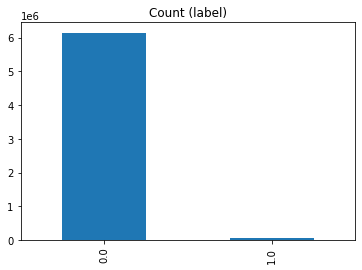

In [ ]:
label_count = df_scaled.label.value_counts()
print('Class 0:', label_count[0])
print('Class 1:', label_count[1])
print('Proportion:', round(label_count[0] / label_count[1], 2), ': 1')

label_count.plot(kind='bar', title='Count (label)');

In [ ]:
X = df_scaled.drop(['label'], axis = 1)
y = df_scaled['label']

In [ ]:
print(X.shape)
print(y.shape)

(6207989, 21)
(6207989,)


In [ ]:
X.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6207989 entries, 0 to 6208073
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   dati2         6207989 non-null  float64
 1   typefaskes    6207989 non-null  float64
 2   usia          6207989 non-null  float64
 3   jenkel        6207989 non-null  float64
 4   pisat         6207989 non-null  float64
 5   jenispel      6207989 non-null  float64
 6   politujuan    6207989 non-null  float64
 7   diagfktp      6207989 non-null  float64
 8   biaya         6207989 non-null  float64
 9   jenispulang   6207989 non-null  float64
 10  cbg           6207989 non-null  float64
 11  kelasrawat    6207989 non-null  float64
 12  kdsa          6207989 non-null  float64
 13  kdsp          6207989 non-null  float64
 14  kdsr          6207989 non-null  float64
 15  kdsi          6207989 non-null  float64
 16  kdsd          6207989 non-null  float64
 17  diag          6207989 non-n

In [ ]:
#todo lakukan split dataset untuk training dan testing
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# summarize class distribution
print("Before undersampling: ", Counter(y_train))

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

# summarize class distribution
print("After undersampling: ", Counter(y_train_under))
print("After oversampling: ", Counter(y_train_over))

Before undersampling:  Counter({0.0: 4608474, 1.0: 47517})
After undersampling:  Counter({0.0: 47517, 1.0: 47517})
After oversampling:  Counter({0.0: 4608474, 1.0: 4608474})


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train_over , y_train_over)
y_pred = dtc.predict(X_test)

tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
specificity = tn/(tn+fp)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = 2*((precision*recall)/(precision+recall))

print("Specificity : ",specificity)
print("Recall : ",recall)
print("Precision : ",precision)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("F1 score : ", f1_score)
print("Classification Report")
print(classification_report(y_test, y_pred))

Specificity :  0.995878610365308
Recall :  0.7304614990718812
Precision :  0.6431469792605952
Accuracy :  0.9932068211428108
F1 score :  0.6840291305781162
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1536375
         1.0       0.64      0.73      0.68     15623

    accuracy                           0.99   1551998
   macro avg       0.82      0.86      0.84   1551998
weighted avg       0.99      0.99      0.99   1551998

